In [77]:
#import libraries
import numpy as np  # numerical operations
import matplotlib.pyplot as plt  # for data visualization
from tensorflow.keras.datasets import imdb  # IMDB dataset
from tensorflow.keras.preprocessing.sequence import pad_sequences  # for sequence padding
from tensorflow.keras.models import Sequential  # model architecture
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout  # neural network layers


In [37]:
# 1. Load the IMDb dataset (top 10,000 most frequent words)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

In [38]:
#2. Print basic dataset information
print('Number of training reviews:', len(X_train))
print('Number of test reviews:', len(X_test))
num_classes = len(set(y_train))
print('Number of categories:', num_classes)

Number of training reviews: 25000
Number of test reviews: 25000
Number of categories: 2


In [78]:
# 3. Print frequency of each label (class distribution)
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("Frequency of each label:")
print(np.asarray((unique_elements, counts_elements)))

# 0 = negative, 1 = positive, [12500 12500]] = num of samples

Frequency of each label:
[[    0     1]
 [12500 12500]]


In [40]:
# 4. Show first training review and its length
print('First training review:', X_train[0])
print('Review length:', len(X_train[0]))

First training review: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Review length: 218


In [41]:
# 5. Analyze review length distribution
reviews_length = [len(review) for review in X_train]
print('Maximum review length:', np.max(reviews_length))
print('Average review length:', np.mean(reviews_length))

Maximum review length: 2494
Average review length: 238.71364


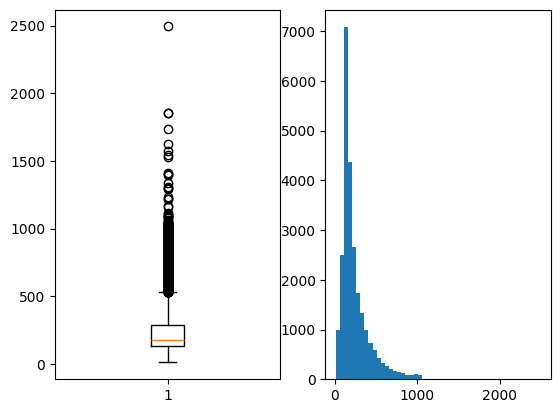

In [42]:
plt.subplot(1, 2, 1)
plt.boxplot(reviews_length)
plt.subplot(1, 2, 2)
plt.hist(reviews_length, bins=50)
plt.show()

In [79]:
# 6. Pad sequences to fixed length (max_len=100)
#Sequences shorter than 100 are padded with zeros at the beginning; longer sequences are truncated to 100.
max_len = 100
X_train_padded = pad_sequences(X_train, maxlen=max_len)
X_test_padded = pad_sequences(X_test, maxlen=max_len)


In [81]:
# 7. Prepare index-to-word dictionary to decode reviews
#Get the word-to-index mapping from the IMDb dataset and create an index-to-word dictionary.
#add 3 to each original index because the first three indices are reserved for special tokens (<pad>, <sos>, <unk>).

word_to_index = imdb.get_word_index()
index_to_word = {value + 3: key for key, value in word_to_index.items()}
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index] = token

In [45]:
# Print decoded first training review (for verification)
print('Decoded first training review:')
print(' '.join([index_to_word.get(index, '?') for index in X_train[0]]))

Decoded first training review:
<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <unk> is an amazing actor and now the same being director <unk> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <unk> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <unk> to the two little boy's that played the <unk> of norman and paul they were just brilliant children are often left out of the <unk> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing 

In [46]:
# Print decoded first training review (for verification)
print('Decoded first training review:')
print(' '.join([index_to_word.get(index, '?') for index in X_train[0]]))

Decoded first training review:
<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <unk> is an amazing actor and now the same being director <unk> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <unk> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <unk> to the two little boy's that played the <unk> of norman and paul they were just brilliant children are often left out of the <unk> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing 

In [48]:
# 8. Define the model
vocab_size = 10000  # Number of unique words considered

In [52]:
# Basic LSTM model
"""
model = Sequential([
    Embedding(vocab_size, 128),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
"""

"\nmodel = Sequential([\n    Embedding(vocab_size, 128),\n    LSTM(64),\n    Dense(1, activation='sigmoid')\n])\n\nmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])\n"

In [82]:
#Bidirectional LSTM with Dropout (comment out Option A if using this)
# Define the model (no input_length)
model = Sequential([
    Embedding(vocab_size, 128), # converts word indices to 128-dimensional dense vectors
    Bidirectional(LSTM(64)), #bidirectional LSTM layer that processes requences forward and backword with 64 units
    Dropout(0.5), #applies 50% of dropout to reduce overfitting
    Dense(1, activation='sigmoid')
])

In [86]:
#Build the model manually (specify input shape)
model.build(input_shape=(None, 100))  # (batch_size, sequence_length)


In [88]:
#Uses binary_crossentropy as the loss function for binary classification
#adam optimizer for efficient and popular gradient-based optimization.

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [89]:
# Show model summary
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ (None, 100, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,378,945 (5.26 MB)

 Trainable params: 1,378,945 (5.26 MB)

 Non-trainable params: 0 (0.00 B)

In [90]:
# 9. Train the model
#Run 5 epochs with a batch size of 64 samples per iteration.
#20% of the training data for validation 
model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 77ms/step - accuracy: 0.6822 - loss: 0.5621 - val_accuracy: 0.8380 - val_loss: 0.3681
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 85ms/step - accuracy: 0.8989 - loss: 0.2639 - val_accuracy: 0.8448 - val_loss: 0.3542
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 89ms/step - accuracy: 0.9318 - loss: 0.1869 - val_accuracy: 0.8378 - val_loss: 0.3892
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 86ms/step - accuracy: 0.9596 - loss: 0.1135 - val_accuracy: 0.8292 - val_loss: 0.5212
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 85ms/step - accuracy: 0.9745 - loss: 0.0743 - val_accuracy: 0.8254 - val_loss: 0.5439


In [22]:
#evaluation 

In [55]:
# 1. Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8308 - loss: 0.5275
Test Accuracy: 0.8327


In [56]:
# 2. Generate predicted probabilities
y_pred = model.predict(X_test_padded)

782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step


In [57]:
# 3. Convert probabilities to binary class labels (threshold = 0.5)
y_pred_labels = (y_pred > 0.5).astype(int).flatten()

In [58]:
print("Predicted labels (first 10):", y_pred_labels[:10])

Predicted labels (first 10): [1 1 1 1 1 1 1 0 1 1]


In [59]:
# 4. Print classification metrics (precision, recall, f1-score)
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [60]:
print("Classification Report:")
print(classification_report(y_test, y_pred_labels))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83     12500
           1       0.83      0.83      0.83     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000



In [61]:
# 5. Compute and print ROC AUC score
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

ROC AUC Score: 0.9081873504


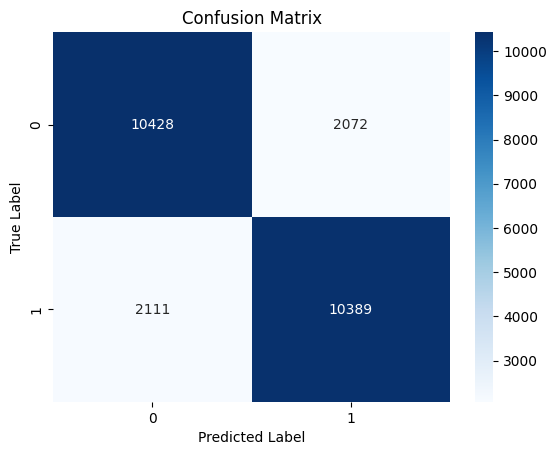

In [62]:
# 6. Plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()